In [1]:
!pip install prophet

import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('train.csv')

# Converting Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Aggregate sales (Sum all store sales by date to get a global trend)
daily_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

#  columns named 'ds' (Date) and 'y' (Value)
daily_sales.columns = ['ds', 'y']

print(daily_sales.head())

          ds            y
0 2010-02-05  49750740.50
1 2010-02-12  48336677.63
2 2010-02-19  48276993.78
3 2010-02-26  43968571.13
4 2010-03-05  46871470.30


In [3]:
# Initialize Prophet with seasonality enabled
m = Prophet(weekly_seasonality=True, yearly_seasonality=True)

# Train the model
m.fit(daily_sales)

# Creating a placeholder for future dates (next 12 weeks)
future = m.make_future_dataframe(periods=12, freq='W')

# Predict
forecast = m.predict(future)

# Show the numbers
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds          yhat    yhat_lower    yhat_upper
150 2012-12-16  6.697430e+07  6.247088e+07  7.137551e+07
151 2012-12-23  6.579851e+07  6.120621e+07  7.030544e+07
152 2012-12-30  5.837643e+07  5.388820e+07  6.286071e+07
153 2013-01-06  4.828666e+07  4.402783e+07  5.266594e+07
154 2013-01-13  4.150306e+07  3.700082e+07  4.573516e+07


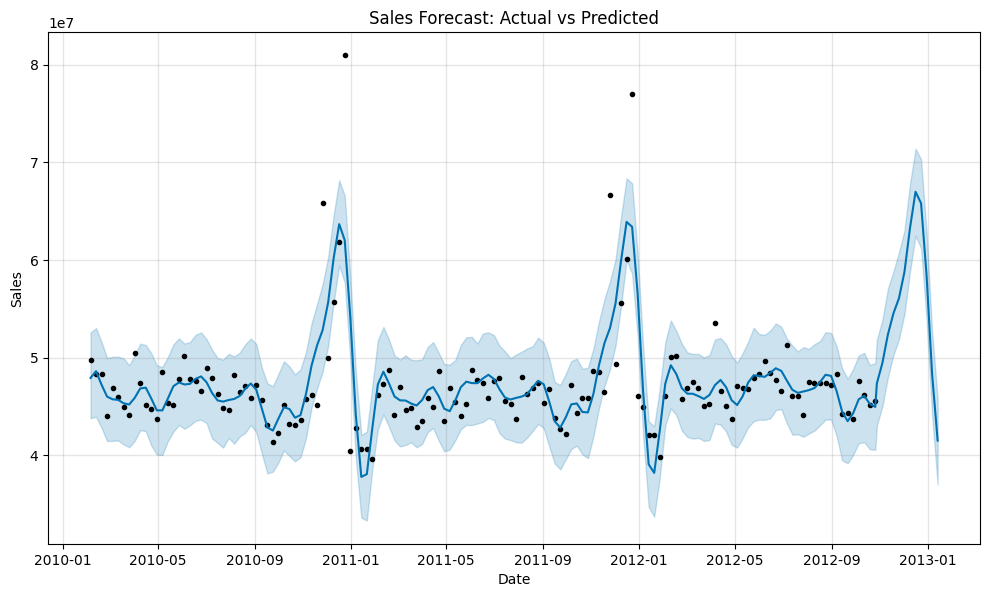

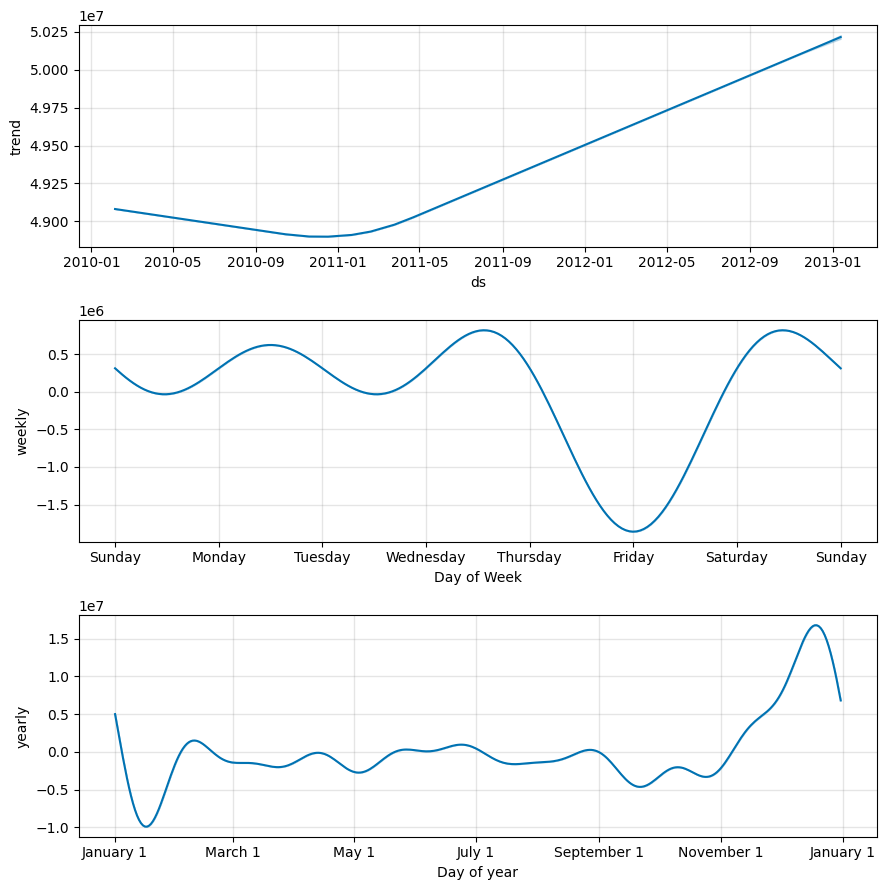

In [4]:
# Plot 1: The Main Forecast
fig1 = m.plot(forecast)
plt.title("Sales Forecast: Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

# Plot 2: The Seasonality Breakdown (Trends)
fig2 = m.plot_components(forecast)